# Bag of words

In [1]:
# Frases de exemplo
frases = [
    "Adorei o produto, chegou certinho!",
    "Muito bom, recomendo a todos.",
    "Excelente qualidade, superou minhas expectativas.",
    "Entrega rápida e produto de primeira!",
    "Fiquei muito satisfeito com a compra."
]
frases

['Adorei o produto, chegou certinho!',
 'Muito bom, recomendo a todos.',
 'Excelente qualidade, superou minhas expectativas.',
 'Entrega rápida e produto de primeira!',
 'Fiquei muito satisfeito com a compra.']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Inicializando o vetor de contagem
vectorizer = CountVectorizer()

# Aplicando o Bag of Words
bag_of_words = vectorizer.fit_transform(frases)
bag_of_words


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 23 stored elements and shape (5, 21)>

In [3]:
import pandas as pd

#  criando dataframe
df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
df

,adorei,bom,certinho,chegou,com,compra,de,entrega,excelente,expectativas,...,minhas,muito,primeira,produto,qualidade,recomendo,rápida,satisfeito,superou,todos
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Naive Bayes

In [4]:
# Frases positivas
frases_positivas = [
    "Adorei o produto, chegou certinho!",
    "Muito bom, recomendo a todos.",
    "Excelente qualidade, superou minhas expectativas.",
    "Entrega rápida e produto de primeira!",
    "Fiquei muito satisfeito com a compra."
]

# Frases negativas
frases_negativas = [
    "Produto ruim, me arrependi.",
    "Demorou demais para chegar.",
    "Veio com defeito e ninguém resolveu.",
    "Não gostei, parecia outra coisa na foto.",
    "Péssimo atendimento, não recomendo."
]

frases = frases_positivas + frases_negativas
frases

['Adorei o produto, chegou certinho!',
 'Muito bom, recomendo a todos.',
 'Excelente qualidade, superou minhas expectativas.',
 'Entrega rápida e produto de primeira!',
 'Fiquei muito satisfeito com a compra.',
 'Produto ruim, me arrependi.',
 'Demorou demais para chegar.',
 'Veio com defeito e ninguém resolveu.',
 'Não gostei, parecia outra coisa na foto.',
 'Péssimo atendimento, não recomendo.']

In [5]:
# sentimentos = ["positivo", "negativo", "negativo"]
sentimentos = ["positivo"] * len(frases_positivas) + ["negativo"] * len(frases_negativas)
sentimentos

['positivo',
 'positivo',
 'positivo',
 'positivo',
 'positivo',
 'negativo',
 'negativo',
 'negativo',
 'negativo',
 'negativo']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 4. Criar e treinar o modelo
modelo = make_pipeline(CountVectorizer(), MultinomialNB())
modelo.fit(frases, sentimentos)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [7]:
# Vamos realizar um teste
testes = [
    "produto excelente",
    "Não gostei do produto, não recomendo"
]

In [8]:
predicoes = modelo.predict(testes)
predicoes

array(['positivo', 'negativo'], dtype='<U8')

In [9]:
# 7. Exibir resultados
for frase, sentimento in zip(testes, predicoes):
    print(f"{frase:<40} → {sentimento}")

produto excelente                        → positivo
Não gostei do produto, não recomendo     → negativo


In [10]:
# Probabilidades a priori
# Suponha que em um conjunto de dados, 60% das frases sejam positivas e 40% negativas
P_positivo = 0.6  # P(positivo)
P_negativo = 0.4  # P(negativo)

# Probabilidades condicionais
# Suponha que essas probabilidades foram aprendidas a partir de um conjunto de treinamento

# Probabilidade da palavra "produto" aparecer em frases positivas
P_produto_positivo = 0.1  # P("produto" | positivo)
# Probabilidade da palavra "ótimo" aparecer em frases positivas
P_otimo_positivo = 0.5    # P("ótimo" | positivo)

# Probabilidade da palavra "produto" aparecer em frases negativas
P_produto_negativo = 0.2  # P("produto" | negativo)
# Probabilidade da palavra "ótimo" aparecer em frases negativas
P_otimo_negativo = 0.05   # P("ótimo" | negativo)

# Frase a ser classificada: "produto ótimo"
# Queremos saber qual classe tem maior probabilidade de gerar essa frase

# Aplicando o Bayes com a suposição de independência (Naive)
# P(positivo | frase) ∝ P(positivo) * P("produto" | positivo) * P("ótimo" | positivo)
prob_positivo = P_positivo * P_produto_positivo * P_otimo_positivo

# P(negativo | frase) ∝ P(negativo) * P("produto" | negativo) * P("ótimo" | negativo)
prob_negativo = P_negativo * P_produto_negativo * P_otimo_negativo

# Exibindo as probabilidades calculadas
print(f"Probabilidade de ser positivo: {prob_positivo:.4f}")
print(f"Probabilidade de ser negativo: {prob_negativo:.4f}")

# Decisão: a classe com maior probabilidade é escolhida
if prob_positivo > prob_negativo:
    print("➡️  A frase foi classificada como: **positivo**")
else:
    print("➡️  A frase foi classificada como: **negativo**")

Probabilidade de ser positivo: 0.0300
Probabilidade de ser negativo: 0.0040
➡️  A frase foi classificada como: **positivo**


# Base de dados

In [11]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/depoimentos-csv/refs/heads/main/reviews_dataset.csv')
df.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [12]:
f'Dimensões: esta base de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas'

'Dimensões: esta base de dados possui 99224 linhas e 7 colunas'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [14]:
# Verificar valores únicos por coluna
df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [15]:
# Verificar valores ausentes por coluna
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [16]:
# Ver exemplos de títulos aleatórios
print(df['review_comment_title'].dropna().sample(10, random_state=42))

82837          Nota 10
74413           Ótimo 
39282             Bom 
41999    relógio casio
81334              BOA
36050        Muito bom
60442          Péssimo
90364             amei
69846            Ótimo
13617        Excelente
Name: review_comment_title, dtype: object


In [17]:
# Distribuição dos scores
print(df['review_score'].value_counts().sort_index())

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


In [18]:
import plotly.express as px

# Contagem e cálculo de percentual
review_score = df['review_score'].value_counts().sort_index().reset_index()
review_score.columns = ['review_score', 'count']
total = review_score['count'].sum()
review_score['percent'] = (review_score['count'] / total * 100).round(2)
review_score['text'] = review_score['count'].astype(str) + ' (' + review_score['percent'].astype(str) + '%)'

# Conversão para string para forçar o mapeamento de cor funcionar corretamente
review_score['review_score'] = review_score['review_score'].astype(int)
review_score['review_score_str'] = review_score['review_score'].astype(str)

# Mapeamento de cores
color_map = {
    1: 'red',
    2: 'orange',
    3: 'blue',
    4: 'lightgreen',
    5: 'green'
}

# Gráfico
fig = px.bar(
    review_score,
    x='review_score',
    y='count',
    text='text',
    title=f'Distribuição das Avaliações ({total} avaliações)',
    labels={'review_score': 'Nota da Avaliação', 'count': 'Quantidade'},
    color='review_score_str',
    color_discrete_map={str(k): v for k, v in color_map.items()}
)

# Estilo e linhas de grade
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(
        dtick=1,
        title='Nota da Avaliação',
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    ),
    yaxis=dict(
        title='Quantidade',
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    ),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='white'
)

fig.show()

# Avaliações com nota 1

In [19]:
df_avaliacoes_nota_1 = df[df['review_score'] == 1]
df_avaliacoes_nota_1.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,NaN,Não gostei ! Comprei gato por lebre,2017-12-13 00:00:00,2017-12-16 07:14:07
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,NaN,Nada de chegar o meu pedido.,2017-04-21 00:00:00,2017-04-23 05:37:03


In [20]:
df_avaliacoes_nota_1 = df[df['review_score'] == 1].drop(columns=[
    'review_id',
    'order_id',
    'review_creation_date',
    'review_answer_timestamp'
])
df_avaliacoes_nota_1.head()

,review_score,review_comment_title,review_comment_message
5,1,NaN,NaN
19,1,Não chegou meu produto,Péssimo
29,1,NaN,Não gostei ! Comprei gato por lebre
32,1,NaN,Sempre compro pela Internet e a entrega ocorre...
39,1,NaN,Nada de chegar o meu pedido.


In [21]:
# renomeando as colunas
df_avaliacoes_nota_1 = df_avaliacoes_nota_1.rename(columns={
    'review_score': 'nota',
    'review_comment_title': 'titulo',
    'review_comment_message': 'mensagem'
})

df_avaliacoes_nota_1.head()

,nota,titulo,mensagem
5,1,NaN,NaN
19,1,Não chegou meu produto,Péssimo
29,1,NaN,Não gostei ! Comprei gato por lebre
32,1,NaN,Sempre compro pela Internet e a entrega ocorre...
39,1,NaN,Nada de chegar o meu pedido.


In [22]:
# Contar quantos títulos são nulos
nulos = df_avaliacoes_nota_1['titulo'].isna().sum()

# Contar quantos títulos NÃO são nulos
nao_nulos = df_avaliacoes_nota_1['titulo'].notna().sum()

print(f"Títulos NULOS: {nulos}")
print(f"Títulos NÃO NULOS: {nao_nulos}")

Títulos NULOS: 9551
Títulos NÃO NULOS: 1873


In [23]:
# Contar quantos msgs são nulos
nulos = df_avaliacoes_nota_1['mensagem'].isna().sum()

# Contar quantos msgs NÃO são nulos
nao_nulos = df_avaliacoes_nota_1['mensagem'].notna().sum()

print(f"Mensagens NULOS: {nulos}")
print(f"Mensagens NÃO NULOS: {nao_nulos}")

Mensagens NULOS: 2679
Mensagens NÃO NULOS: 8745


In [24]:
import plotly.graph_objects as go

# Dicionário com colunas e cores
colunas = {
    'mensagem': {'cor_nao_nulo': 'green', 'cor_nulo': 'red'},
    'titulo': {'cor_nao_nulo': 'green', 'cor_nulo': 'red'}
}

# Posicionamento personalizado no eixo x
x_labels = list(colunas.keys())
x_pos = list(range(len(x_labels)))  # [0, 1]

# Criar gráfico
fig = go.Figure()

# Flags para mostrar legenda apenas uma vez
legenda_nao_nulo = True
legenda_nulo = True

# Adicionar barras
for i, (coluna, cores) in enumerate(colunas.items()):
    nulos = df_avaliacoes_nota_1[coluna].isna().sum()
    nao_nulos = df_avaliacoes_nota_1[coluna].notna().sum()

    # Não Nulo
    fig.add_trace(go.Bar(
        x=[x_pos[i] - 0.15],
        y=[nao_nulos],
        marker_color=cores['cor_nao_nulo'],
        text=[nao_nulos],
        textposition='auto',
        name='Não Nulo' if legenda_nao_nulo else None,
        showlegend=legenda_nao_nulo
    ))
    legenda_nao_nulo = False  # Só mostra na primeira vez

    # Nulo
    fig.add_trace(go.Bar(
        x=[x_pos[i] + 0.15],
        y=[nulos],
        marker_color=cores['cor_nulo'],
        text=[nulos],
        textposition='auto',
        name='Nulo' if legenda_nulo else None,
        showlegend=legenda_nulo
    ))
    legenda_nulo = False  # Só mostra na primeira vez

# Adicionar anotações centralizadas
fig.update_layout(
    annotations=[
        dict(
            x=pos, y=-200,
            text=label,
            showarrow=False,
            xanchor='center',
            yanchor='top'
        ) for label, pos in zip(x_labels, x_pos)
    ],
    xaxis=dict(
        tickvals=[],
        showline=False
    ),
    yaxis_title='Quantidade',
    title='Contagem de Dados Nulos e Não Nulos de "MENSAGEM" e "TÍTULO"',
    barmode='group',
    template='plotly_white',
    margin=dict(b=80),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.25,
        xanchor='center',
        x=0.5
    )
)

fig.show()

In [25]:
# 10 títulos mais frequentes
df_avaliacoes_nota_1['titulo'].value_counts().head(20)

titulo
Não recomendo               44
Ruim                        37
não recomendo               34
Não recebi o produto        30
Produto errado              30
Produto não entregue        26
Produto com defeito         22
Péssimo                     16
Péssimo                     15
Não recebi                  13
NÃO RECOMENDO               13
0                           11
nao recomendo               11
ruim                        10
Não recebi o produto        10
Entrega incompleta          10
Pessimo                      9
Zero                         9
Produto não foi entregue     8
Não chegou                   7
Name: count, dtype: int64

In [26]:
# 10 avaliações lower mais frequentes
df_avaliacoes_nota_1['mensagem'].str.lower().value_counts().head(20)

mensagem
não recebi o produto           40
nao recebi o produto           20
não recebi o produto           15
não recebi                     15
ainda não recebi o produto     12
produto não entregue           10
ainda não recebi               10
não recebi o produto.           9
ainda nao recebi o produto      8
ruim                            7
ainda não recebi o produto      7
bom                             7
ainda não recebi o produto.     6
o produto não foi entregue      5
nao recebi                      5
não recebi o produto ainda      5
demora na entrega               5
o produto não chegou            5
não recebi meu produto          4
produto não foi entregue        4
Name: count, dtype: int64

# Avaliando as mensagens

In [27]:
# criando uma coluna para verificar se temos mensagens
df_avaliacoes_nota_1['tem_mensagem'] = df_avaliacoes_nota_1['mensagem'].notna()
df_avaliacoes_nota_1.head()

,nota,titulo,mensagem,tem_mensagem
5,1,NaN,NaN,False
19,1,Não chegou meu produto,Péssimo,True
29,1,NaN,Não gostei ! Comprei gato por lebre,True
32,1,NaN,Sempre compro pela Internet e a entrega ocorre...,True
39,1,NaN,Nada de chegar o meu pedido.,True


In [28]:
import plotly.express as px

# Contagem de valores
contagem = df_avaliacoes_nota_1['tem_mensagem'].value_counts().rename(index={True: 'Com', False: 'Sem'})

# Criação do gráfico
fig = px.pie(
    names=contagem.index,
    values=contagem.values,
    title='Distribuição das Avaliações com Nota 1: Com ou Sem Mensagem',
    color=contagem.index,
    color_discrete_map={
        'Com': '#334756',
        'Sem': '#FF4C29'
    }
)

# Ajustes visuais
fig.update_traces(textinfo='percent+label')
fig.show()

# Analise de sentimentos - Nota 1

In [29]:
!pip install -q wordcloud nltk spacy
!python -m spacy download pt_core_news_sm

import nltk
nltk.download('stopwords')
nltk.download('rslp')

from nltk.corpus import stopwords
from collections import Counter
import string
import spacy

# Carrega modelo do spaCy
nlp = spacy.load("pt_core_news_sm")


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/13.0 MB 11.2 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/13.0 MB 12.2 MB/s eta 0:00:01
     ---------------------- ----------------- 7.3/13.0 MB 12.9 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/13.0 MB 13.1 MB/s eta 0:00:01
     ------------------------------------- - 12.6/13.0 MB 12.5 MB/s eta 0:00:01
     --------------------------------------- 13.0/13.0 MB 12.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madeinweb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\madeinweb\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [30]:
# Carregar stopwords do NLTK
stopwords_pt = set(stopwords.words('portuguese'))

# 1. Juntar todas as mensagens de avaliações nota 1
texto_unico = ' '.join(df_avaliacoes_nota_1['mensagem'].dropna()).lower()
texto_unico

'péssimo não gostei ! comprei gato por lebre sempre compro pela internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. no stark o prazo máximo já se esgotou e ainda não recebi o produto. nada de chegar o meu pedido. recebi somente 1 controle midea split estilo.\r\nfaltou controle remoto para ar condicionado consul o produto não chegou no prazo estipulado e causou transtorno, pq programei a viagem de férias do meu filho, baseado no prazo. moro na bahia e ele em cuiabá sozinho. agora, a casa está vazia.  produto muito inferior, mal acabado. pedi reembolso e sem resposta até momento  este foi o pedido\r\nbalde com 128 peças - blocos de montar 2 un - r$ 25,00 cada (não foi entregue)\r\nvendido e entregue targaryen\r\ntapete de eva nº letras 36 peças crianças 1 un - r$ 35,90 (este foi entreg comprei tres pacotes de cinco folhas cada de papel transfer para tecido escuro e so recebi dois não funciona não faz sincronismo chegou apenas uma peça, mas na nota e na 

In [31]:
# 2. Remover pontuações
for caractere in string.punctuation:
    texto_unico = texto_unico.replace(caractere, '')

texto_unico

'péssimo não gostei  comprei gato por lebre sempre compro pela internet e a entrega ocorre antes do prazo combinado que acredito ser o prazo máximo no stark o prazo máximo já se esgotou e ainda não recebi o produto nada de chegar o meu pedido recebi somente 1 controle midea split estilo\r\nfaltou controle remoto para ar condicionado consul o produto não chegou no prazo estipulado e causou transtorno pq programei a viagem de férias do meu filho baseado no prazo moro na bahia e ele em cuiabá sozinho agora a casa está vazia  produto muito inferior mal acabado pedi reembolso e sem resposta até momento  este foi o pedido\r\nbalde com 128 peças  blocos de montar 2 un  r 2500 cada não foi entregue\r\nvendido e entregue targaryen\r\ntapete de eva nº letras 36 peças crianças 1 un  r 3590 este foi entreg comprei tres pacotes de cinco folhas cada de papel transfer para tecido escuro e so recebi dois não funciona não faz sincronismo chegou apenas uma peça mas na nota e na garantia constam as duas 

In [32]:
# 3. Processar texto com spaCy
doc = nlp(texto_unico)
doc

péssimo não gostei  comprei gato por lebre sempre compro pela internet e a entrega ocorre antes do prazo combinado que acredito ser o prazo máximo no stark o prazo máximo já se esgotou e ainda não recebi o produto nada de chegar o meu pedido recebi somente 1 controle midea split estilo
faltou controle remoto para ar condicionado consul o produto não chegou no prazo estipulado e causou transtorno pq programei a viagem de férias do meu filho baseado no prazo moro na bahia e ele em cuiabá sozinho agora a casa está vazia  produto muito inferior mal acabado pedi reembolso e sem resposta até momento  este foi o pedido
balde com 128 peças  blocos de montar 2 un  r 2500 cada não foi entregue
vendido e entregue targaryen
tapete de eva nº letras 36 peças crianças 1 un  r 3590 este foi entreg comprei tres pacotes de cinco folhas cada de papel transfer para tecido escuro e so recebi dois não funciona não faz sincronismo chegou apenas uma peça mas na nota e na garantia constam as duas joias eu não 

```nlp(texto_unico)```


Tokeniza o texto — quebra em palavras.

Lematiza — transforma palavras na sua forma base (ex: "comprando" vira "comprar").

Classifica as palavras — identifica se é substantivo, verbo, adjetivo etc.

Detecta entidades — nomes de pessoas, datas, lugares, etc.

Faz análise gramatical — sabe o papel de cada palavra na frase.

O resultado é um objeto chamado Doc, que guarda todos esses dados.

In [33]:
texto_exemplo = "A entrega foi rápida e eficiente."
doc_exemplo = nlp(texto_exemplo)

for token in doc_exemplo:
    print(f"{token.text:10} | {token.pos_:6} | {token.lemma_}")

A          | DET    | o
entrega    | NOUN   | entrega
foi        | AUX    | ser
rápida     | ADJ    | rápido
e          | CCONJ  | e
eficiente  | ADJ    | eficiente
.          | PUNCT  | .


| Código | Classe Gramatical         | Exemplo                        |
|------------------|----------------------------|---------------------------------|
| `NOUN`           | Substantivo                | produto, entrega                |
| `VERB`           | Verbo                      | chegar, demorar                 |
| `ADJ`            | Adjetivo                   | rápido, horrível                |
| `ADV`            | Advérbio                   | rapidamente, muito              |
| `PRON`           | Pronome                    | eu, você, ele                   |
| `DET`            | Determinante               | o, a, os, as                    |
| `ADP`            | Preposição                 | de, em, com                     |
| `CCONJ`          | Conjunção coordenativa     | e, mas                          |
| `SCONJ`          | Conjunção subordinativa    | que, porque                     |
| `INTJ`           | Interjeição                | ah, poxa                        |
| `AUX`            | Verbo auxiliar             | foi, está, ser                  |
| `PART`           | Partícula                  | (uso específico)                |
| `PUNCT`          | Pontuação                  | ., !, ?                         |
| `NUM`            | Número                     | um, dois, 100                   |
| `SYM`            | Símbolo                    | %, &, $                         |
| `X`              | Outro / Desconhecido       | palavras irreconhecíveis        |
| `SPACE`          | Espaço                     | (geralmente ignorado)           |


In [34]:
# 4. Filtrar tokens relevantes: sem stopwords, sem pontuação, apenas palavras significativas
palavras_filtradas = [
    token.lemma_ for token in doc
    if token.is_alpha and                         # apenas palavras (sem números/símbolos)
       token.lemma_ not in stopwords_pt and       # remove stopwords
       len(token.lemma_) > 2 and                  # remove palavras muito curtas
       token.pos_ in ['NOUN', 'VERB', 'ADJ']      # apenas substantivos, verbos e adjetivos
]
palavras_filtradas

['péssimo',
 'gostar',
 'comprei',
 'compro',
 'entrega',
 'ocorrer',
 'prazo',
 'combinado',
 'acreditar',
 'prazo',
 'grande',
 'stark',
 'prazo',
 'grande',
 'esgotar',
 'recebi',
 'produto',
 'chegar',
 'pedido',
 'recebir',
 'controle',
 'midea',
 'splitr',
 'estilo',
 'faltar',
 'controle',
 'remoto',
 'condicionado',
 'consul',
 'produto',
 'chegar',
 'prazo',
 'estipular',
 'causar',
 'transtorno',
 'programei',
 'viagem',
 'férias',
 'filho',
 'basear',
 'prazo',
 'moro',
 'bahia',
 'cuiabá',
 'sozinho',
 'casa',
 'vazer',
 'produto',
 'inferior',
 'acabar',
 'pedir',
 'reembolso',
 'resposta',
 'momento',
 'pedido',
 'peça',
 'bloco',
 'montar',
 'entregar',
 'vender',
 'entregar',
 'targaryen',
 'tapete',
 'Letras',
 'peça',
 'crianço',
 'entreg',
 'comprei',
 'pacote',
 'folha',
 'papel',
 'transfer',
 'tecido',
 'escuro',
 'recebi',
 'funcionar',
 'fazer',
 'sincronismo',
 'chegar',
 'peça',
 'nota',
 'garantia',
 'constar',
 'joia',
 'recebi',
 'produto',
 'constar',
 'si

In [35]:
# 5. Contar as 20 palavras mais frequentes
palavras_mais_comuns = Counter(palavras_filtradas).most_common(20)

print("Top 20 palavras mais frequentes (repetidas conforme frequência):")
print(palavras_mais_comuns)

Top 20 palavras mais frequentes (repetidas conforme frequência):
[('produto', 5411), ('recebi', 2292), ('entregar', 1792), ('comprei', 1365), ('chegar', 1242), ('vir', 1182), ('ter', 1008), ('dia', 992), ('entrega', 962), ('compra', 803), ('loja', 746), ('prazo', 701), ('pedido', 590), ('fazer', 524), ('querer', 493), ('receber', 492), ('recebir', 476), ('site', 412), ('contato', 405), ('pedir', 392)]


In [36]:
import plotly.express as px

# Criar gráfico diretamente a partir da lista de tuplas
fig = px.bar(
    x=[item[0] for item in palavras_mais_comuns],
    y=[item[1] for item in palavras_mais_comuns],
    labels={'x': 'Palavra (com stemming)', 'y': 'Frequência'},
    title='Top 20 Palavras Mais Frequentes com Stemming (Avaliações Nota 1)',
    text=[item[1] for item in palavras_mais_comuns]  # mostra valor fora da barra
)

# Ajustes visuais
fig.update_traces(marker_color='indianred', textposition='outside')
fig.update_layout(
    height=800,
    plot_bgcolor='white',
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)

fig.show()

In [37]:
# melhorando com stemmer
from nltk.stem import RSLPStemmer

stemmer = RSLPStemmer()

In [38]:
# exemplo de stem de entregar, entrega...
print(stemmer.stem('entrega'))
print(stemmer.stem('entregar'))
print(stemmer.stem('entregou'))
print(stemmer.stem('entregaram'))

entreg
entreg
entreg
entreg


In [39]:
# Aplicar stemming nas palavras filtradas
palavras_stem = [stemmer.stem(p) for p in palavras_filtradas]
palavras_stem

['péss',
 'gost',
 'compr',
 'compr',
 'entreg',
 'ocorr',
 'praz',
 'combin',
 'acredit',
 'praz',
 'grand',
 'stark',
 'praz',
 'grand',
 'esgot',
 'receb',
 'produt',
 'cheg',
 'ped',
 'receb',
 'control',
 'mide',
 'splitr',
 'estil',
 'falt',
 'control',
 'remot',
 'condicion',
 'consul',
 'produt',
 'cheg',
 'praz',
 'estipul',
 'caus',
 'transtorn',
 'program',
 'viag',
 'férias',
 'filh',
 'base',
 'praz',
 'mor',
 'bah',
 'cuiab',
 'so',
 'cas',
 'vaz',
 'produt',
 'inferi',
 'acab',
 'ped',
 'reembols',
 'respost',
 'moment',
 'ped',
 'peç',
 'bloc',
 'mont',
 'entreg',
 'vend',
 'entreg',
 'targaryen',
 'tapet',
 'letr',
 'peç',
 'crianç',
 'entreg',
 'compr',
 'pacot',
 'folh',
 'papel',
 'transf',
 'tec',
 'escur',
 'receb',
 'funcion',
 'faz',
 'sincron',
 'cheg',
 'peç',
 'not',
 'garant',
 'const',
 'joi',
 'receb',
 'produt',
 'const',
 'sistem',
 'receb',
 'pag',
 'car',
 'fret',
 'compr',
 'relógi',
 'unissex',
 'envi',
 'relógi',
 'feminin',
 'pequen',
 'especific',

In [40]:
frequencia_stem = Counter(palavras_stem).most_common(20)
frequencia_stem

[('produt', 5416),
 ('receb', 3314),
 ('compr', 2855),
 ('entreg', 2780),
 ('cheg', 1263),
 ('vir', 1188),
 ('ter', 1008),
 ('dia', 994),
 ('ped', 990),
 ('loj', 759),
 ('praz', 703),
 ('aguard', 625),
 ('quer', 555),
 ('pag', 535),
 ('faz', 526),
 ('falt', 493),
 ('envi', 481),
 ('cancel', 462),
 ('sit', 414),
 ('contat', 412)]

In [41]:
# Criar gráfico diretamente a partir da lista de tuplas
fig = px.bar(
    x=[item[0] for item in frequencia_stem],
    y=[item[1] for item in frequencia_stem],
    labels={'x': 'Palavra (com stemming)', 'y': 'Frequência'},
    title='Top 20 Palavras Mais Frequentes com Stemming (Avaliações Nota 1)'
)

fig.update_layout(height=600)
fig.update_traces(marker_color='indianred')
fig.show()

In [42]:
from collections import defaultdict

# Criar dicionário para mapear cada stem às palavras originais que o geraram
stem_para_palavras = defaultdict(list)

for palavra in palavras_filtradas:
    stem = stemmer.stem(palavra)
    stem_para_palavras[stem].append(palavra)

# Para cada stem da frequencia, encontrar a palavra original mais comum
melhores_representacoes = {}
for stem, freq in frequencia_stem:
    palavras_originais = stem_para_palavras[stem]
    palavra_mais_comum = Counter(palavras_originais).most_common(1)[0][0]
    melhores_representacoes[stem] = palavra_mais_comum

# Exibir resultado
melhores_representacoes

{'produt': 'produto',
 'receb': 'recebi',
 'compr': 'comprei',
 'entreg': 'entregar',
 'cheg': 'chegar',
 'vir': 'vir',
 'ter': 'ter',
 'dia': 'dia',
 'ped': 'pedido',
 'loj': 'loja',
 'praz': 'prazo',
 'aguard': 'aguardar',
 'quer': 'querer',
 'pag': 'paguei',
 'faz': 'fazer',
 'falt': 'faltar',
 'envi': 'enviar',
 'cancel': 'cancelar',
 'sit': 'site',
 'contat': 'contato'}

In [43]:
import pandas as pd

# Lista original com stemming e frequência
frequencia_stem = [
    ('produt', 5416),
    ('receb', 3314),
    ('compr', 2855),
    ('entreg', 2780),
    ('cheg', 1263),
    ('vir', 1188),
    ('ter', 1008),
    ('dia', 994),
    ('ped', 990),
    ('loj', 759),
    ('praz', 703),
    ('aguard', 625),
    ('quer', 555),
    ('pag', 535),
    ('faz', 526),
    ('falt', 493),
    ('envi', 481),
    ('cancel', 462),
    ('sit', 414),
    ('contat', 412)
]

# Mapeamento das raízes corretas (lemmas)
mapa_lemmas = {
    'produt': 'produto',
    'receb': 'receber',
    'compr': 'comprar',
    'entreg': 'entregar',
    'cheg': 'chegar',
    'vir': 'vir',
    'ter': 'ter',
    'dia': 'dia',
    'ped': 'pedido',
    'loj': 'loja',
    'praz': 'prazo',
    'aguard': 'aguardar',
    'quer': 'querer',
    'pag': 'pagar',
    'faz': 'fazer',
    'falt': 'faltar',
    'envi': 'enviar',
    'cancel': 'cancelar',
    'sit': 'site',
    'contat': 'contato'
}

# Criar DataFrame
df_frequencia = pd.DataFrame([
    {
        'reclamacao': mapa_lemmas[stem],
        'stem': stem,
        'quantidade': freq
    }
    for stem, freq in frequencia_stem
])

# Exibir o resultado
df_frequencia

,reclamacao,stem,quantidade
0,produto,produt,5416
1,receber,receb,3314
2,comprar,compr,2855
3,entregar,entreg,2780
4,chegar,cheg,1263
5,vir,vir,1188
6,ter,ter,1008
7,dia,dia,994
8,pedido,ped,990
9,loja,loj,759


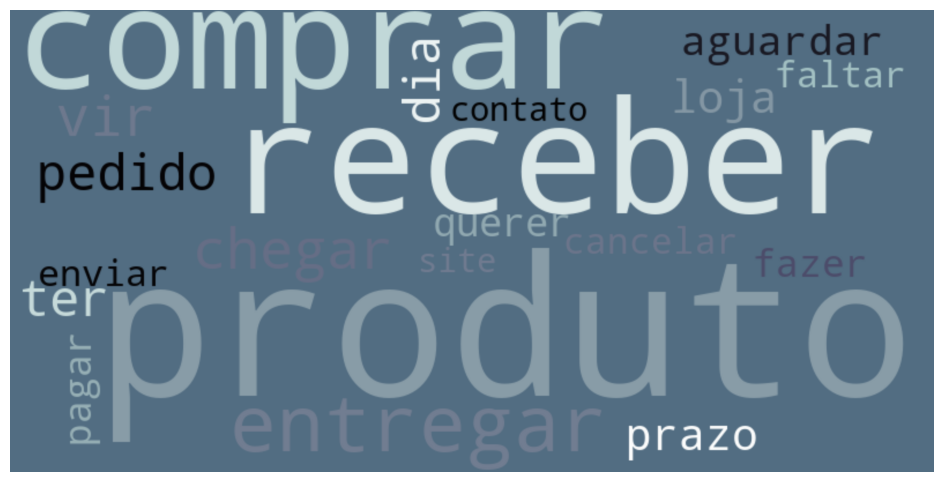

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Criar dicionário {palavra: quantidade}
frequencia_dict = dict(zip(df_frequencia['reclamacao'], df_frequencia['quantidade']))

# Gerar WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='#526D82',
    colormap='bone'
).generate_from_frequencies(frequencia_dict)

# Exibir o WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='quadric')
plt.axis('off')
plt.show()

# Super função

In [45]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [46]:
df_avaliacoes_nota_3 = df[df['review_score'] == 3]
df_avaliacoes_nota_3.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
14,9a0abbb668bafb95a6d2b05db43284c4,d7bd0e4afdf94846eb73642b4e3e75c3,3,NaN,NaN,2017-04-30 00:00:00,2017-05-03 00:02:22
18,fdbdb2629a7cde0f66657acc92084e7f,70a752414a13d09cc1f2b437b914b28e,3,NaN,NaN,2017-09-29 00:00:00,2017-10-02 01:12:49
56,cb6fe4f91f83d9222b7c8e14959055e1,84226f5c73669d7711ca44aa9cac602a,3,NaN,NaN,2018-05-10 00:00:00,2018-05-13 22:51:53
57,45a523faa4defdf60118a90301b8a23e,26c4ac9998f72d4fcdca3c6e27089f1b,3,NaN,NaN,2017-10-27 00:00:00,2017-10-27 16:12:52
70,951a3591f5bcc0b0c558461c9bf49d8e,801524a8fbd37484e8d8c23448f113b5,3,NaN,NaN,2018-07-14 00:00:00,2018-07-14 21:04:31


In [47]:
import plotly.graph_objects as go

def analisar_avaliacoes_por_nota(df, nota):
    # Filtrar avaliações pela nota
    df_nota = df[df['review_score'] == nota].copy()

    # Remover colunas desnecessárias
    colunas_para_remover = [
        'review_id',
        'order_id',
        'review_creation_date',
        'review_answer_timestamp'
    ]
    df_nota = df_nota.drop(columns=colunas_para_remover, errors='ignore')  # ignore evita erro se alguma não existir

    # Renomear colunas
    df_nota = df_nota.rename(columns={
        'review_score': 'nota',
        'review_comment_title': 'titulo',
        'review_comment_message': 'mensagem'
    })

    # Contar nulos e não nulos
    titulos_nulos = df_nota['titulo'].isna().sum()
    titulos_nao_nulos = df_nota['titulo'].notna().sum()
    mensagens_nulas = df_nota['mensagem'].isna().sum()
    mensagens_nao_nulas = df_nota['mensagem'].notna().sum()

    # Exibir contagem
    print(f"\nAnálise das avaliações com nota {nota}\n")
    print(f"Títulos NULOS: {titulos_nulos}")
    print(f"Títulos NÃO NULOS: {titulos_nao_nulos}")
    print(f"Mensagens NULOS: {mensagens_nulas}")
    print(f"Mensagens NÃO NULOS: {mensagens_nao_nulas}\n")

    # Gráfico com Plotly
    colunas = {
        'mensagem': {'cor_nao_nulo': 'green', 'cor_nulo': 'red'},
        'titulo': {'cor_nao_nulo': 'green', 'cor_nulo': 'red'}
    }

    x_labels = list(colunas.keys())
    x_pos = list(range(len(x_labels)))

    fig = go.Figure()
    legenda_nao_nulo = True
    legenda_nulo = True

    for i, (coluna, cores) in enumerate(colunas.items()):
        nulos = df_nota[coluna].isna().sum()
        nao_nulos = df_nota[coluna].notna().sum()

        fig.add_trace(go.Bar(
            x=[x_pos[i] - 0.15],
            y=[nao_nulos],
            marker_color=cores['cor_nao_nulo'],
            text=[nao_nulos],
            textposition='auto',
            name='Não Nulo' if legenda_nao_nulo else None,
            showlegend=legenda_nao_nulo
        ))
        legenda_nao_nulo = False

        fig.add_trace(go.Bar(
            x=[x_pos[i] + 0.15],
            y=[nulos],
            marker_color=cores['cor_nulo'],
            text=[nulos],
            textposition='auto',
            name='Nulo' if legenda_nulo else None,
            showlegend=legenda_nulo
        ))
        legenda_nulo = False

    fig.update_layout(
        annotations=[
            dict(
                x=pos, y=-200,
                text=label,
                showarrow=False,
                xanchor='center',
                yanchor='top'
            ) for label, pos in zip(x_labels, x_pos)
        ],
        xaxis=dict(tickvals=[], showline=False),
        yaxis_title='Quantidade',
        title=f'Dados Nulos e Não Nulos (Nota {nota})',
        barmode='group',
        template='plotly_white',
        margin=dict(b=80),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=-0.25,
            xanchor='center',
            x=0.5
        )
    )

    fig.show()
    return df_nota


In [48]:
df_avaliacoes_nota_1 = analisar_avaliacoes_por_nota(df, 1)
df_avaliacoes_nota_1


Análise das avaliações com nota 1

Títulos NULOS: 9551
Títulos NÃO NULOS: 1873
Mensagens NULOS: 2679
Mensagens NÃO NULOS: 8745



,nota,titulo,mensagem
5,1,NaN,NaN
19,1,Não chegou meu produto,Péssimo
29,1,NaN,Não gostei ! Comprei gato por lebre
32,1,NaN,Sempre compro pela Internet e a entrega ocorre...
39,1,NaN,Nada de chegar o meu pedido.
...,...,...,...
99144,1,NaN,NaN
99155,1,NaN,Eu recebi o seguinte email e preciso saber com...
99169,1,NaN,Boa tarde. \r\nNão recebo todos os produtos fa...
99184,1,NaN,NaN


In [49]:
df_avaliacoes_nota_3 = analisar_avaliacoes_por_nota(df, 3)
df_avaliacoes_nota_3


Análise das avaliações com nota 3

Títulos NULOS: 7355
Títulos NÃO NULOS: 824
Mensagens NULOS: 4622
Mensagens NÃO NULOS: 3557



,nota,titulo,mensagem
14,3,NaN,NaN
18,3,NaN,NaN
56,3,NaN,NaN
57,3,NaN,NaN
70,3,NaN,NaN
...,...,...,...
99197,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...
99198,3,NaN,NaN
99212,3,NaN,NaN
99215,3,NaN,"O produto não foi enviado com NF, não existe v..."


In [50]:
df_avaliacoes_nota_5 = analisar_avaliacoes_por_nota(df, 5)
df_avaliacoes_nota_5


Análise das avaliações com nota 5

Títulos NULOS: 50670
Títulos NÃO NULOS: 6658
Mensagens NULOS: 36774
Mensagens NÃO NULOS: 20554



,nota,titulo,mensagem
1,5,NaN,NaN
2,5,NaN,NaN
3,5,NaN,Recebi bem antes do prazo estipulado.
4,5,NaN,Parabéns lojas lannister adorei comprar pela I...
6,5,NaN,NaN
...,...,...,...
99217,5,NaN,NaN
99218,5,NaN,NaN
99219,5,NaN,NaN
99220,5,NaN,NaN


# Classificando sentimentos

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [52]:
# 1. Filtrar avaliações apenas com notas 1 e 5,
#    removendo aquelas sem mensagem ou com mensagem vazia
df_treino = df[df['review_score'].isin([1, 5])].copy()
df_treino = df_treino[df_treino['review_comment_message'].notna()]
df_treino = df_treino[df_treino['review_comment_message'].str.strip() != ""]

In [53]:
# 2. Criar a variável alvo 'sentimento' mapeando
#    nota 1 → 'negativo' e nota 5 → 'positivo'
df_treino['sentimento'] = df_treino['review_score'].map({1: 'negativo', 5: 'positivo'})

In [54]:
# 3. Separar as features (X) e o target (y)
X = df_treino['review_comment_message']
y = df_treino['sentimento']

"""
Dividindo o conjunto de dados em entrada e saída
para o modelo de machine learning.

A variável X (features)
recebe todas as mensagens de texto que serão usadas como base
para aprender padrões (“o que o modelo vê”),
enquanto a variável y (target) recebe o rótulo de sentimento correspondente
a cada mensagem — “negativo” ou “positivo”
(“o que o modelo deve prever”).

Assim, durante o treinamento, o algoritmo aprende a associar
cada padrão de texto em X com seu rótulo em y, permitindo depois
classificar novas mensagens.
"""

'\nDividindo o conjunto de dados em entrada e saída\npara o modelo de machine learning.\n\nA variável X (features)\nrecebe todas as mensagens de texto que serão usadas como base\npara aprender padrões (“o que o modelo vê”),\nenquanto a variável y (target) recebe o rótulo de sentimento correspondente\na cada mensagem — “negativo” ou “positivo”\n(“o que o modelo deve prever”).\n\nAssim, durante o treinamento, o algoritmo aprende a associar\ncada padrão de texto em X com seu rótulo em y, permitindo depois\nclassificar novas mensagens.\n'

In [55]:
# 4. Construir o pipeline manual:
#    4.1. Vetorizar o texto com Bag of Words
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)
#    4.2. Treinar o modelo Naive Bayes Multinomial
modelo = MultinomialNB()
modelo.fit(X_vec, y)

MultinomialNB()

In [56]:
# 5. Preparar o conjunto de predição:
#    filtrar novamente apenas notas 1 e 5, sem mensagens nulas ou vazias
df_pred = df[df['review_score'].isin([1, 5])].copy()
df_pred = df_pred[df_pred['review_comment_message'].notna()]
df_pred = df_pred[df_pred['review_comment_message'].str.strip() != ""]

#    vetorizar as mensagens de predição
X_todas = df_pred['review_comment_message']
X_todas_vec = vectorizer.transform(X_todas)
#    gerar as previsões de sentimento
df_pred['sentimento_predito'] = modelo.predict(X_todas_vec)

In [57]:
# 6. Mapear o sentimento real para comparação
#    nota 1 → 'negativo', nota 5 → 'positivo'
df_pred['sentimento_real'] = df_pred['review_score'].map({1: 'negativo', 5: 'positivo'})

In [58]:
# 7. Exibir 2 exemplos aleatórios de predição
print(df_pred[['review_score', 'review_comment_message',
               'sentimento_real', 'sentimento_predito']]
      .sample(2, random_state=12))

       review_score                             review_comment_message  \
31748             1                       o produto é falso, ridiculo!   
79609             5  É muito bom comprar e encontrar grandes vended...   

      sentimento_real sentimento_predito  
31748        negativo           negativo  
79609        positivo           positivo  


In [59]:
# 8. Calcular e exibir a acurácia do modelo
acuracia = accuracy_score(df_pred['sentimento_real'], df_pred['sentimento_predito'])
print(f"\nAcurácia do modelo: {acuracia:.4f} ({acuracia*100:.2f}%)")


Acurácia do modelo: 0.9505 (95.05%)


In [60]:
def classificar_frase(frase):
    # Vetorizar a frase com o mesmo CountVectorizer usado no treino
    frase_vetorizada = vectorizer.transform([frase])

    # Fazer a predição com o modelo treinado
    sentimento = modelo.predict(frase_vetorizada)[0]

    # Exibir resultado
    print(f"Sentimento previsto: {sentimento.upper()}")

# Exemplo de uso
entrada = input("Digite uma frase para classificar: ")
classificar_frase(entrada)

Sentimento previsto: POSITIVO


# N-grams

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Três frases para enriquecer a análise
frases = [
    "o produto chegou no prazo",
    "recebi o produto rapidamente",
    "o produto não chegou",
    "o produto chegou quebrado"
]

# Unigrama (n=1)
vectorizer_uni = CountVectorizer(ngram_range=(1, 1))
X_uni = vectorizer_uni.fit_transform(frases)
print("Unigrama:", vectorizer_uni.get_feature_names_out())

print()

# Bigrama (n=2)
vectorizer_bi = CountVectorizer(ngram_range=(2, 2))
X_bi = vectorizer_bi.fit_transform(frases)
print("Bigrama:", vectorizer_bi.get_feature_names_out())

Unigrama: ['chegou' 'no' 'não' 'prazo' 'produto' 'quebrado' 'rapidamente' 'recebi']

Bigrama: ['chegou no' 'chegou quebrado' 'no prazo' 'não chegou' 'produto chegou'
 'produto não' 'produto rapidamente' 'recebi produto']


---

**Unigrama**

É uma lista de todas as palavras únicas que aparecem nas frases.

1.   Conta quantas vezes cada palavra isolada aparece.
2.   Ideal para análises básicas de frequência, nuvens de palavras, etc.
3.   Não leva em conta o contexto da frase.

---

**Bigrama**

É uma lista de todos os pares de palavras consecutivas encontradas

1.   Mostra contexto e relação entre palavras.
2.   Ajuda a entender expressões comuns ou importantes

---

In [62]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import spacy

# Baixar recursos
nltk.download('stopwords')
nltk.download('rslp')
nlp = spacy.load("pt_core_news_sm")
stopwords_pt = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madeinweb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\madeinweb\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [63]:
# 2. Filtrar mensagens não nulas e não vazias
mensagens = df['review_comment_message'].dropna()
mensagens = mensagens[mensagens.str.strip() != ""]

# 3. Pré-processar: remover stopwords manualmente e deixar tudo minúsculo
def remover_stopwords(texto):
    tokens = texto.lower().split()
    tokens_filtrados = [t for t in tokens if t not in stopwords_pt]
    return " ".join(tokens_filtrados)

mensagens_processadas = mensagens.apply(remover_stopwords)

# 4. Instanciar CountVectorizer para 1-3 grams, sem stopwords automáticas
vectorizer = CountVectorizer(ngram_range=(1, 3), min_df=10)

# 5. Ajustar e transformar
X_ngrams = vectorizer.fit_transform(mensagens_processadas)

# 6. Somar as ocorrências
soma = X_ngrams.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# 7. Criar DataFrame de frequências
df_ngrams = pd.DataFrame({'ngram': terms, 'count': soma})
df_ngrams = df_ngrams.sort_values(by='count', ascending=False).reset_index(drop=True)

# 8. Exibir os 20 mais frequentes
print(df_ngrams.head(20))

             ngram  count
0          produto  18428
1            prazo   8475
2          entrega   6528
3            antes   5626
4           chegou   5555
5           recebi   5274
6              bom   4607
7        recomendo   4337
8      antes prazo   4193
9         entregue   3779
10            veio   3285
11             bem   3112
12       qualidade   2772
13         comprei   2763
14            loja   2409
15           ainda   2337
16            tudo   2332
17          compra   2206
18          gostei   1896
19  recebi produto   1872


In [64]:
import plotly.express as px

# Selecionar os 20 n-grams mais frequentes
top_ngrams = df_ngrams.head(20)

# Criar gráfico
fig = px.bar(
    top_ngrams,
    x='count',
    y='ngram',
    orientation='h',
    title='Top 20 N-grams mais frequentes nas mensagens',
    labels={'ngram': 'N-grama', 'count': 'Frequência'},
    text='count'
)

# Ajustar layout
fig.update_traces(marker_color='royalblue', textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    plot_bgcolor='white',
    height=600
)

# Exibir gráfico
fig.show()


In [65]:
# 1. Filtrar mensagens não nulas e não vazias
mensagens = df['review_comment_message'].dropna()
mensagens = mensagens[mensagens.str.strip() != ""]

# 2. Remover stopwords manualmente
def remover_stopwords(texto):
    tokens = texto.lower().split()
    tokens_filtrados = [t for t in tokens if t not in stopwords_pt]
    return " ".join(tokens_filtrados)

mensagens_processadas = mensagens.apply(remover_stopwords)

# 3. CountVectorizer para bigrams apenas
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=10)
X_bigrams = vectorizer.fit_transform(mensagens_processadas)

# 4. Somar frequências
frequencias = X_bigrams.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()

# 5. Criar DataFrame com os bigrams
df_bigrams = pd.DataFrame({'ngram': bigrams, 'count': frequencias})
df_bigrams = df_bigrams.sort_values(by='count', ascending=False).reset_index(drop=True)

# 6. Selecionar os 20 mais frequentes
top_bigrams = df_bigrams.head(20)

# 7. Criar gráfico com Plotly
fig = px.bar(
    top_bigrams,
    x='count',
    y='ngram',
    orientation='h',
    title='Top 20 Bigramas mais frequentes nas mensagens',
    labels={'ngram': 'Bigram', 'count': 'Frequência'},
    text='count'
)

fig.update_traces(marker_color='indianred', textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    plot_bgcolor='white',
    height=600
)

fig.show()

In [66]:
# 1. Filtrar mensagens válidas
mensagens = df['review_comment_message'].dropna()
mensagens = mensagens[mensagens.str.strip() != ""]

# 2. Função para remover stopwords
def remover_stopwords(texto):
    tokens = texto.lower().split()
    tokens_filtrados = [t for t in tokens if t not in stopwords_pt]
    return " ".join(tokens_filtrados)

mensagens_processadas = mensagens.apply(remover_stopwords)

# 3. Extrair trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), min_df=5)  # min_df ajustável
X_trigrams = vectorizer.fit_transform(mensagens_processadas)

# 4. Frequências
frequencias = X_trigrams.sum(axis=0).A1
trigrams = vectorizer.get_feature_names_out()

# 5. DataFrame ordenado
df_trigrams = pd.DataFrame({'ngram': trigrams, 'count': frequencias})
df_trigrams = df_trigrams.sort_values(by='count', ascending=False).reset_index(drop=True)

# 6. Selecionar top 20
top_trigrams = df_trigrams.head(20)

# 7. Plotly
fig = px.bar(
    top_trigrams,
    x='count',
    y='ngram',
    orientation='h',
    title='Top 20 Trigramas mais frequentes nas mensagens',
    labels={'ngram': 'Trigrama', 'count': 'Frequência'},
    text='count'
)

fig.update_traces(marker_color='seagreen', textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    plot_bgcolor='white',
    height=650
)

fig.show()

In [67]:
# 1. Filtrar apenas mensagens de nota 1, não nulas e não vazias
mensagens_nota_1 = df[df['review_score'] == 1]['review_comment_message'].dropna()
mensagens_nota_1 = mensagens_nota_1[mensagens_nota_1.str.strip() != ""]

# 2. Função para remover stopwords
def remover_stopwords(texto):
    tokens = texto.lower().split()
    tokens_filtrados = [t for t in tokens if t not in stopwords_pt]
    return " ".join(tokens_filtrados)

# 3. Aplicar o pré-processamento
mensagens_processadas = mensagens_nota_1.apply(remover_stopwords)

# 4. Extrair trigramas com CountVectorizer
vectorizer = CountVectorizer(ngram_range=(3, 3), min_df=3)  # Ajuste min_df conforme necessário
X_trigrams = vectorizer.fit_transform(mensagens_processadas)

# 5. Obter frequências
frequencias = X_trigrams.sum(axis=0).A1
trigrams = vectorizer.get_feature_names_out()

# 6. Criar DataFrame
df_trigrams = pd.DataFrame({'ngram': trigrams, 'count': frequencias})
df_trigrams = df_trigrams.sort_values(by='count', ascending=False).reset_index(drop=True)

# 7. Selecionar top 20
top_trigrams = df_trigrams.head(20)

# 8. Gráfico com Plotly
fig = px.bar(
    top_trigrams,
    x='count',
    y='ngram',
    orientation='h',
    title='Top 20 Trigramas nas Avaliações com Nota 1',
    labels={'ngram': 'Trigrama', 'count': 'Frequência'},
    text='count'
)

fig.update_traces(marker_color='crimson', textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    plot_bgcolor='white',
    height=650
)

fig.show()

In [68]:
# Função para limpar mensagens
def remover_stopwords(texto):
    tokens = texto.lower().split()
    tokens_filtrados = [t for t in tokens if t not in stopwords_pt]
    return " ".join(tokens_filtrados)

# Mensagens Nota 1
mensagens_negativas = df[df['review_score'] == 1]['review_comment_message'].dropna()
mensagens_negativas = mensagens_negativas[mensagens_negativas.str.strip() != ""]
mensagens_negativas = mensagens_negativas.apply(remover_stopwords)

# Mensagens Nota 5
mensagens_positivas = df[df['review_score'] == 5]['review_comment_message'].dropna()
mensagens_positivas = mensagens_positivas[mensagens_positivas.str.strip() != ""]
mensagens_positivas = mensagens_positivas.apply(remover_stopwords)

# Vetorizador para trigramas
vectorizer = CountVectorizer(ngram_range=(3, 3), min_df=3)

# Trigramas NEGATIVOS
X_neg = vectorizer.fit_transform(mensagens_negativas)
trigrams_neg = vectorizer.get_feature_names_out()
counts_neg = X_neg.sum(axis=0).A1
df_neg = pd.DataFrame({'ngram': trigrams_neg, 'count': counts_neg})
df_neg = df_neg.sort_values(by='count', ascending=False).head(20)

# Trigramas POSITIVOS
vectorizer = CountVectorizer(ngram_range=(3, 3), min_df=3)
X_pos = vectorizer.fit_transform(mensagens_positivas)
trigrams_pos = vectorizer.get_feature_names_out()
counts_pos = X_pos.sum(axis=0).A1
df_pos = pd.DataFrame({'ngram': trigrams_pos, 'count': counts_pos})
df_pos = df_pos.sort_values(by='count', ascending=False).head(20)

# --- Gráfico comparativo com Plotly (duas colunas lado a lado)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_neg['count'],
    y=df_neg['ngram'],
    name='Sentimento Negativo (Nota 1)',
    orientation='h',
    marker_color='crimson'
))

fig.add_trace(go.Bar(
    x=df_pos['count'],
    y=df_pos['ngram'],
    name='Sentimento Positivo (Nota 5)',
    orientation='h',
    marker_color='green'
))

fig.update_layout(
    barmode='group',
    title='Top 20 Trigramas: Comparação entre Sentimentos (Nota 1 vs Nota 5)',
    xaxis_title='Frequência',
    yaxis=dict(autorange="reversed", title='Trigrama'),
    plot_bgcolor='white',
    height=800
)

fig.show()

C:\Users\madeinweb\AppData\Local\Temp\ipykernel_25340\2549162647.py:37: UserWarning:

Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.

C:\Users\madeinweb\AppData\Local\Temp\ipykernel_25340\2549162647.py:37: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.

c:\Users\madeinweb\Documents\GitHub\text-mining-sentiment-analysis-nlp\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.

c:\Users\madeinweb\Documents\GitHub\text-mining-sentiment-analysis-nlp\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.



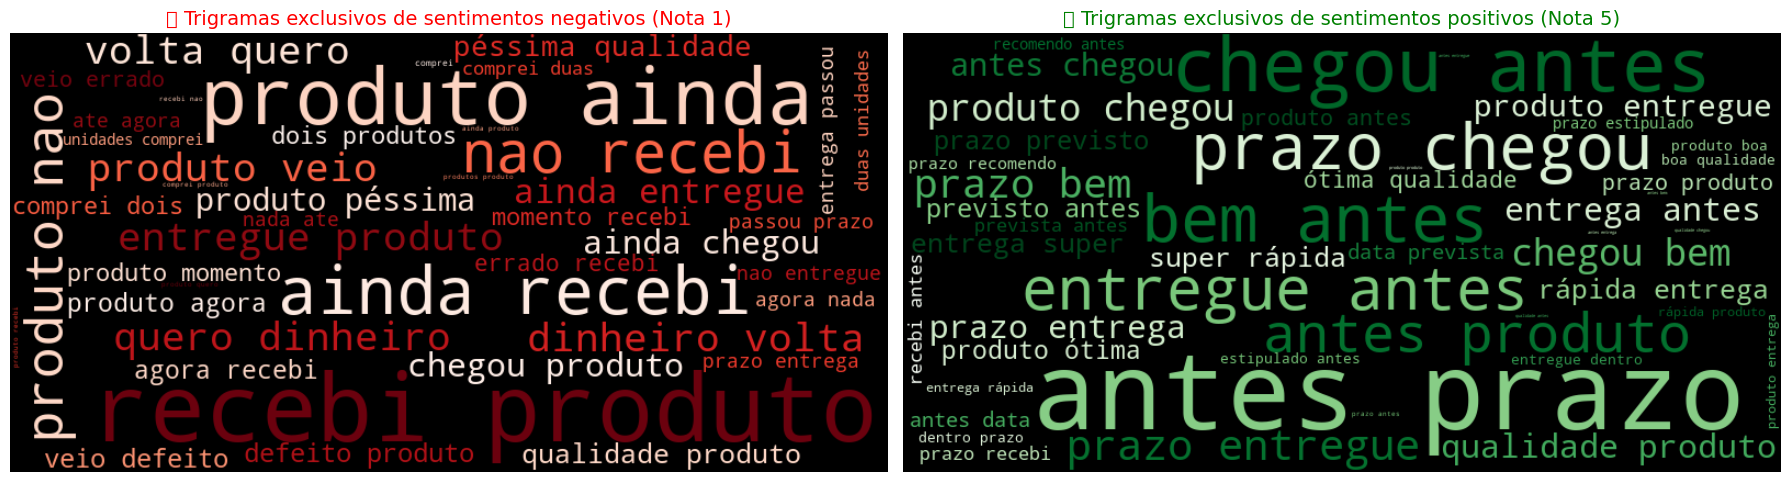

In [69]:
import matplotlib.pyplot as plt

# 1. Obter trigramas exclusivos de cada sentimento
set_neg = set(df_neg['ngram'])
set_pos = set(df_pos['ngram'])

# Exclusivos negativos e positivos
exclusivos_neg = set_neg - set_pos
exclusivos_pos = set_pos - set_neg

# 2. Criar strings proporcionais à frequência
texto_neg = ' '.join(
    (ngram + ' ') * int(df_neg[df_neg['ngram'] == ngram]['count'].values[0])
    for ngram in exclusivos_neg
)

texto_pos = ' '.join(
    (ngram + ' ') * int(df_pos[df_pos['ngram'] == ngram]['count'].values[0])
    for ngram in exclusivos_pos
)

# 3. Criar as nuvens de palavras
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(texto_neg)
wc_pos = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(texto_pos)

# 4. Plotar
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

axs[0].imshow(wc_neg, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('🔴 Trigramas exclusivos de sentimentos negativos (Nota 1)', fontsize=14, color='red')

axs[1].imshow(wc_pos, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('🟢 Trigramas exclusivos de sentimentos positivos (Nota 5)', fontsize=14, color='green')

plt.tight_layout()
plt.show()